<a href="https://colab.research.google.com/github/DataEtnos/estudos_python/blob/main/Enriquecimento_(Feature_Engineering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

from IPython.core.display import HTML
from ipywidgets import interact, widgets
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

In [98]:
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    rc={
        'figure.figsize': (12,8)
    }
)

In [99]:
#função pra deixar as tabelas na mesma linha (lado a lado)
def display_side_by_side(dataframes:list,titles:list):
    html_str=''
    for df,title in zip(dataframes, titles):
        html_str+=f'<span>{title}:</span>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+="&nbsp"*10
    display(HTML(html_str))

Feature engineering, ou enriquecimento, consiste em uma das etapas mais importantes para construir bons modelos de machine learning.

O objetivo da feature engineering é tornar os dados melhor aproveitáveis para resolver o problema proposto. Através da feature engineering, podemos:

- Melhor a performance preditiva do modelo
- Reduzir custos computacionais ou necessidades de dados
- Aumentar a interpretabilidade dos resultados


In [100]:
#Data set de gorjeta
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Neste caso, poderíamos adicionar uma coluna que representa o quanto a gorjeta representa da conta total, ou o valor da conta divido pelo tamanho da mesa (size):

In [101]:
#amostragem de retirada de uma nova coluna , com operação basica aritmética
df['tip_normalized'] = df['tip'] / df['total_bill']
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_normalized
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [102]:
#Base do titanic para estudo de extração de str .

df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
df.Name.str.extract('.+?, (.+?)\.', expand=False)

PassengerId
1        Mr
2       Mrs
3      Miss
4       Mrs
5        Mr
       ... 
887     Rev
888    Miss
889    Miss
890      Mr
891      Mr
Name: Name, Length: 891, dtype: object

In [104]:
#Retirando subtitulo do nome que vai ser usado no data set e alocando na coluna personal_title
df['personal_title'] = df.Name.str.extract('.+?, (.+?)\.', expand=False)
df.head()

# '.+?, (.+?)\. > padrão no texto, depois da virgula e antes do ponto

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,personal_title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


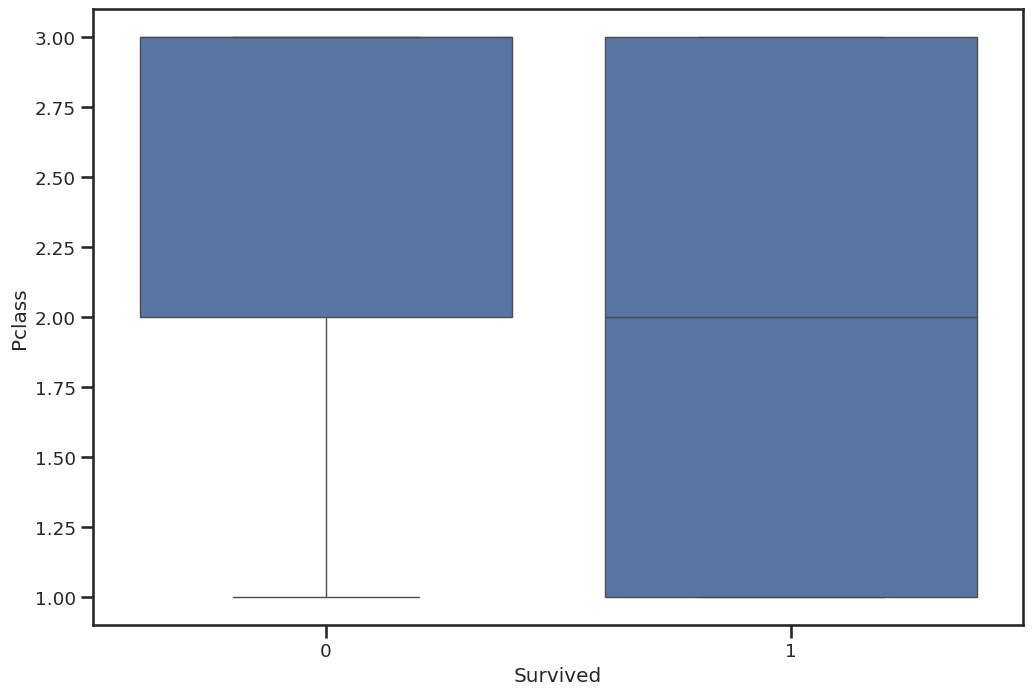

In [105]:
# Observando diferenças nas distribuições
sns.boxplot(data=df, x='Survived', y='Pclass');

<Axes: xlabel='Pclass', ylabel='Age'>

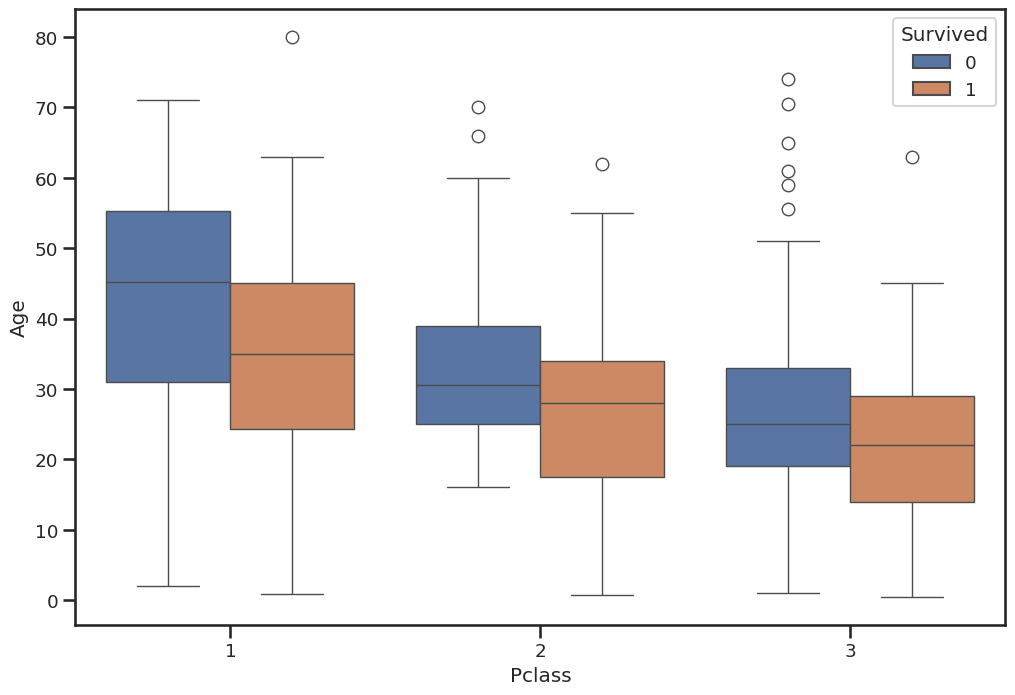

In [106]:
sns.boxplot(data=df, x='Pclass' ,  y= 'Age' , hue = 'Survived')

In [107]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,personal_title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [108]:
df.select_dtypes(include='object').head()

,Name,Sex,Ticket,Cabin,Embarked,personal_title
PassengerId,,,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,Mrs
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,Mrs
5,"Allen, Mr. William Henry",male,373450,NaN,S,Mr


In [109]:
# Drop columns and NAs
df_model = df.drop(columns=['Name','Ticket','Cabin']).dropna()
df_model.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,personal_title
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Mr
2,1,1,female,38.0,1,0,71.2833,C,Mrs
3,1,3,female,26.0,0,0,7.9250,S,Miss
4,1,1,female,35.0,1,0,53.1000,S,Mrs
5,0,3,male,35.0,0,0,8.0500,S,Mr


**MUTUAL INFORMATION

O Mutual Information (Informação Mútua) é uma medida estatística que quantifica a dependência entre duas variáveis ​​aleatórias. Em essência, ele mede quanto a informação de uma variável pode nos dizer sobre a outra variável. Quanto maior o valor da informação mútua, maior é a dependência entre as variáveis.

Em termos mais técnicos, o Mutual Information entre duas variáveis aleatórias X e Y é calculado como a redução na incerteza sobre uma variável (digamos, X) quando a outra variável (Y) é observada. Matematicamente, é definido como a diferença entre a entropia de X e a entropia condicional de X dado Y:

\[I(X;Y) = H(X) - H(X|Y)\]

Onde:
- \(I(X;Y)\) é a informação mútua entre X e Y.
- \(H(X)\) é a entropia de X, que mede o grau de incerteza associado a X.
- \(H(X|Y)\) é a entropia condicional de X dado Y, que mede a incerteza remanescente sobre X quando Y é conhecido.

Em resumo, quanto maior a informação mútua entre duas variáveis, mais informações uma variável fornece sobre a outra, o que implica uma maior dependência entre elas. É uma medida útil em muitas áreas, incluindo processamento de sinais, aprendizado de máquina, teoria da informação e estatística.

In [110]:
#Definindo o alvo do modelo
target = df_model['Survived']
df_features = df_model.drop(columns='Survived')

In [117]:
#transformando colunas em numero
cat_features = df_features.select_dtypes(exclude='number').columns

encoder = OrdinalEncoder()
df_features[cat_features] = encoder.fit_transform(df_features[cat_features]).astype(int)

df_features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,personal_title
PassengerId,,,,,,,,
1,3,1,22.0,1,0,7.2500,2,11
2,1,0,38.0,1,0,71.2833,0,12
3,3,0,26.0,0,0,7.9250,2,8
4,1,0,35.0,1,0,53.1000,2,12
5,3,1,35.0,0,0,8.0500,2,11


In [118]:
#verificando se todas as colunas realemte se tornaram  numero
discrete_features = df_features.dtypes==int
discrete_features

Pclass             True
Sex                True
Age               False
SibSp              True
Parch              True
Fare              False
Embarked           True
personal_title     True
dtype: bool

In [120]:
# Ultilizando a tecnica de mutual_information
scores = mutual_info_classif(X=df_features, y=target, discrete_features=discrete_features)
scores

array([0.06516276, 0.14840857, 0.03415372, 0.01723787, 0.02126715,
       0.14468353, 0.01930984, 0.17785974])

<Axes: >

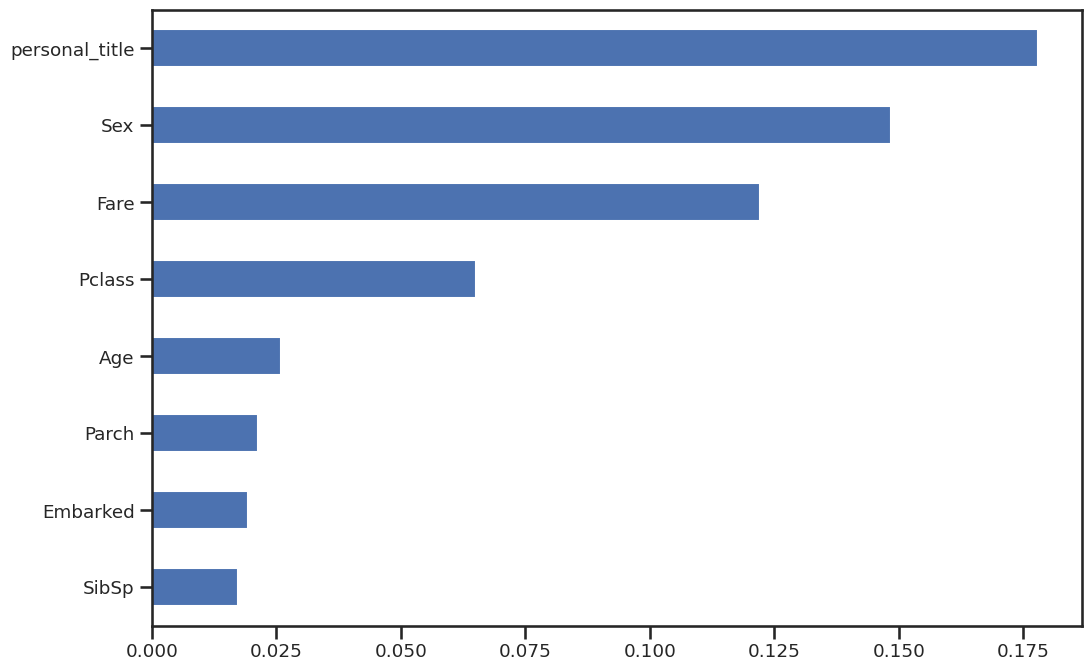

In [115]:
#avaliação de feature que pode contribuir para sobrevivencia .
pd.Series(data=scores, index=df_features.columns).sort_values().plot.barh()

**Observação:** MI, assim como correlação, é uma métrica **univariada**,

---

portanto, não necessariamente uma variável com baixo score de MI vai ter pouca importância para o modelo, pois pode ser que, quando associada à outra variável, ambas variáveis contribuam para o modelo.